## **1 - EDA**

In [2]:
# Importing the necessary packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [3]:
# Importing the csv files

artists = pd.read_csv('recatoma_artists.csv')
albums = pd.read_csv('recatoma_albums.csv')

In [4]:
# Visualizing artists DataFrames shape
print(artists.shape)

# Visualizing the artists DataFrame (DF)
artists.head()

(922, 4)


playcount            name  \
0        189  Caetano Veloso   
1        131     David Bowie   
2        122          Watson   
3        102           Kinky   
4         99           Feist   

                                                tags  \
0     mpb, brazilian, Bossa Nova, tropicalia, brasil   
1    rock, glam rock, classic rock, 80s, alternative   
2                seen live, Grime, indie, rock, punk   
3       rock, alternative, electronic, mexico, latin   
4  female vocalists, indie, singer-songwriter, Ca...   

                                     similar_artists  
0  Gilberto Gil, Gal Costa, Maria Bethânia, Chico...  
1  Tin Machine, Lou Reed, Iggy Pop, Roxy Music, T...  
2  Club Silêncio, J-Sweet, Blazin Beats, Kosha, R...  
3  Plastilina Mosh, Zoé, Jumbo, La Gusana Ciega, ...  
4  Cat Power, Broken Social Scene, Laura Marling,...

In [5]:
# Renaming the column 'name' from the artists DF
artists.rename(columns={'name': 'artist'}, inplace=True)

# Checking the renamed column
artists.head()

playcount          artist  \
0        189  Caetano Veloso   
1        131     David Bowie   
2        122          Watson   
3        102           Kinky   
4         99           Feist   

                                                tags  \
0     mpb, brazilian, Bossa Nova, tropicalia, brasil   
1    rock, glam rock, classic rock, 80s, alternative   
2                seen live, Grime, indie, rock, punk   
3       rock, alternative, electronic, mexico, latin   
4  female vocalists, indie, singer-songwriter, Ca...   

                                     similar_artists  
0  Gilberto Gil, Gal Costa, Maria Bethânia, Chico...  
1  Tin Machine, Lou Reed, Iggy Pop, Roxy Music, T...  
2  Club Silêncio, J-Sweet, Blazin Beats, Kosha, R...  
3  Plastilina Mosh, Zoé, Jumbo, La Gusana Ciega, ...  
4  Cat Power, Broken Social Scene, Laura Marling,...

In [6]:
# Visualizing albums DF shape
print(albums.shape)

# Visualizing the albums DF
albums.head()

(1210, 4)


playcount                          name                       artists  \
0         72                  Sky Blue Sky                         Wilco   
1         60  The United States of America  The United States of America   
2         57                    Widow City            The Fiery Furnaces   
3         55                     Mind Bomb                       The The   
4         53                    Let It Die                         Feist   

                                                tags  
0  albums I own, best of 2007, indie, 2007, favor...  
1  psychedelic, 60s, experimental, 1968, Psychede...  
2   albums I own, indie, american, 00s, best of 2007  
3   1989, alternative, 80s, johnny marr, never stale  
4  albums I own, female vocalists, favorite album...

In [7]:
# Renaming the column 'name' from the artists DF
albums.rename(columns={'name':'album', 'artists':'artist'}, inplace=True)

# Checking the renamed column
albums.head()

playcount                         album                        artist  \
0         72                  Sky Blue Sky                         Wilco   
1         60  The United States of America  The United States of America   
2         57                    Widow City            The Fiery Furnaces   
3         55                     Mind Bomb                       The The   
4         53                    Let It Die                         Feist   

                                                tags  
0  albums I own, best of 2007, indie, 2007, favor...  
1  psychedelic, 60s, experimental, 1968, Psychede...  
2   albums I own, indie, american, 00s, best of 2007  
3   1989, alternative, 80s, johnny marr, never stale  
4  albums I own, female vocalists, favorite album...

In [8]:
# Creating a new DataFrame to check the number of albums per artists and the playcount  
total_albums = albums.groupby('artist')['playcount'].agg(['count', 'sum'])

# Reseting the index
total_albums.reset_index(inplace=True)

# Renaming columns
total_albums.rename(columns={'count':'albums',  'sum':'playcount'}, inplace=True)

# Sorting values by albums 
total_albums.sort_values(by=['albums', 'playcount'], ascending=False, inplace=True)

# Looking at the top 10 
total_albums.head(10)

artist  albums  playcount
103      Caetano Veloso      21        135
87            Bob Dylan      18         66
522          Pink Floyd      15         35
174        Depeche Mode      13         79
732     Various Artists      13         33
680  The Rolling Stones      11         64
164         David Bowie      10        124
143       Cocteau Twins       9         41
641            The Cure       9         41
649  The Fiery Furnaces       8         70

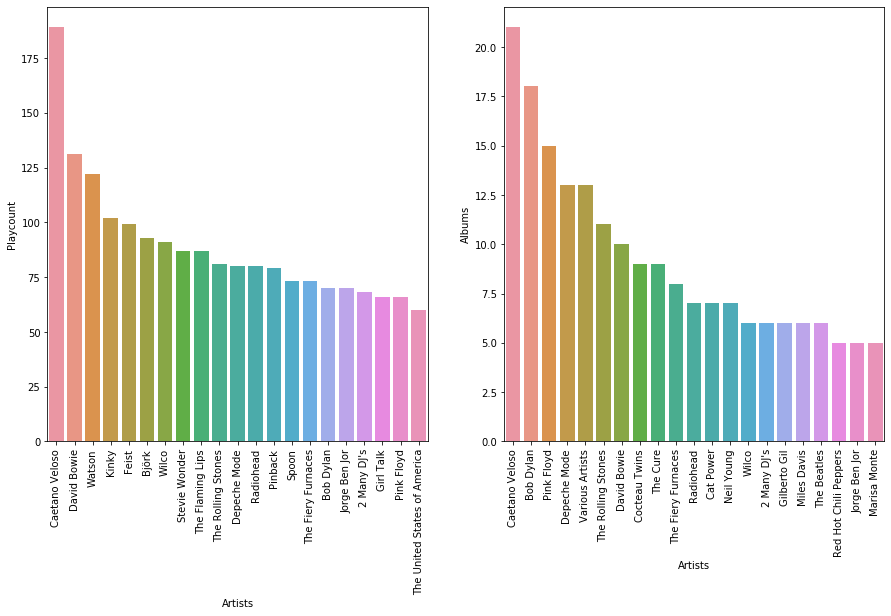

In [9]:
# Comparing the playcounts from the albums and artist DF 

# Setting the figure size
plt.figure(figsize=(15,8))

# First subplot - artists playcount
plt.subplot(1,2,1)
g = sns.barplot(x=artists['artist'].iloc[0:21],
           y=artists['playcount'].iloc[0:21],
           data = artists)
plt.xlabel('Artists')
plt.ylabel('Playcount')
# Rotating the labels for better visualization
g.set_xticklabels(g.get_xticklabels(), rotation=90);

# Second subplot - artist's albums playcount
plt.subplot(1,2,2)
h = sns.barplot(x=total_albums['artist'].iloc[0:21],
           y=total_albums['albums'].iloc[0:21],
           data = total_albums)
plt.xlabel('Artists')
plt.ylabel('Albums')
# Rotating the labels for better visualization
h.set_xticklabels(h.get_xticklabels(), rotation=90);

In [10]:
# Type of object contained in each column
artists.dtypes

playcount           int64
artist             object
tags               object
similar_artists    object
dtype: object

In [11]:
# Transforming objects into strings
artists['artist'] = artists['artist'].apply(lambda x: str(x))
artists['similar_artists'] = artists['similar_artists'].apply(lambda x: str(x))
artists['tags'] = artists['tags'].apply(lambda x: str(x))

# Data types of the DF's columns
artists.dtypes

playcount           int64
artist             object
tags               object
similar_artists    object
dtype: object

In [12]:
# Creating two new columns: tags and similar artists in lists
artists['similar_artists_list'] = artists['similar_artists'].apply(lambda x: x.split(', '))

# Visualizing the new column
artists.head()

playcount          artist  \
0        189  Caetano Veloso   
1        131     David Bowie   
2        122          Watson   
3        102           Kinky   
4         99           Feist   

                                                tags  \
0     mpb, brazilian, Bossa Nova, tropicalia, brasil   
1    rock, glam rock, classic rock, 80s, alternative   
2                seen live, Grime, indie, rock, punk   
3       rock, alternative, electronic, mexico, latin   
4  female vocalists, indie, singer-songwriter, Ca...   

                                     similar_artists  \
0  Gilberto Gil, Gal Costa, Maria Bethânia, Chico...   
1  Tin Machine, Lou Reed, Iggy Pop, Roxy Music, T...   
2  Club Silêncio, J-Sweet, Blazin Beats, Kosha, R...   
3  Plastilina Mosh, Zoé, Jumbo, La Gusana Ciega, ...   
4  Cat Power, Broken Social Scene, Laura Marling,...   

                                similar_artists_list  
0  [Gilberto Gil, Gal Costa, Maria Bethânia, Chic...  
1  [Tin Machine, Lou Reed, Iggy Pop, Roxy Music, ...  
2  [Club Silêncio, J-Sweet, Blazin Beats, Kosha, ...  
3  [Plastilina Mosh, Zoé, Jumbo, La Gusana Ciega,...  
4  [Cat Power, Broken Social Scene, Laura Marling...

In [13]:
# Function to keep only the name of the artists listed in the 'artists' columns
def str_match(x):
    '''
    return the name of the artists that are in a list
    '''
    
    # Create a list with all listened artists
    list_artists = artists['artist'].tolist()
    # Empty list to store only the similar artists who are in the 'list_artists' list
    list_similar = []
    
    # Looping to append the similar artists to the empty list
    for i in list_artists:
    # Condition to be met in order to append a value to the list
        if i in x:
            list_similar.append(i)
    
    # Conditional argument to avoid any empyt lists
    if len(list_similar) == 0:
        list_similar.append('none')
    
    return list_similar

In [14]:
# Creating new column using the str_match funciton
artists['similar_artists_nx']  = artists['similar_artists_list'].apply(lambda x: str_match(x))

# Converting the lists into strings
artists['similar_artists_nx'] = artists['similar_artists_nx'].apply(', '.join)


In [15]:
# Creating a list with all the tags 
tags = artists['tags'].apply(lambda x: x.split(',')).tolist()

# Importing itertools package
import itertools

# Merging the lists of lists
tagz = itertools.chain.from_iterable(tags)

# Converting the result to a list
tags = list(tagz)

# Visualizing the final list
print(tags)

 ' trip-hop', ' electronic', ' alternative', ' female vocalists', 'pop', ' indie', ' Bh', ' Brega', ' Minas Gerais', 'instrumental', ' folk', ' Hammond', ' library music', ' french', 'synthpop', ' pop', ' female vocalists', ' french', ' indie pop', 'indie', ' indie rock', ' post-punk', ' alternative', ' seen live', 'psychedelic', ' seen live', ' experimental', ' psychedelic pop', ' New Zealand', 'electronic', ' japanese', ' shibuya-kei', ' electronica', ' alternative', 'jazz', ' swing', ' Big Band', ' piano', ' blues', 'Alt-country', ' female vocalists', ' alternative', ' Canadian', ' indie', 'hardcore', ' rock', ' brazilian', ' melodic hardcore', ' brazilian rock', 'folk', ' singer-songwriter', ' indie', ' seen live', ' americana', 'jazz', ' experimental', ' chicago', 'seen live', ' electronic', ' experimental', ' Avant-Garde', ' indie', 'Hip-Hop', ' underground hip-hop', ' rap', ' hip hop', ' mf doom', 'alternative', ' new wave', ' singer-songwriter', ' rock', ' seen live', 'jazz', '

In [16]:
# Creating a dictionary with the name of the tag and the number of times it appears on the list
tags_dict = dict((i, tags.count(i)) for i in set(tags))

# Creating a DF using tags_dict
tags_df = pd.DataFrame(tags_dict.items())

# Renaming the DF columns from numbers to names
tags_df.rename(columns={0:'tag', 1: 'total'}, inplace=True)

# Sorting the DF by the number of occurrances 
tags_df.sort_values(by=['total'], ascending=False, inplace=True)

# Lowercasing the tags
tags_df['tag'] = tags_df['tag'].apply(lambda x: str.lower(x))

# Visualizing the 35 more mentioned tags
tags_df.head(35)


tag  total
492               indie    170
163           seen live    157
432                rock    150
325         alternative    135
221           brazilian    123
51     female vocalists    114
103              brasil     92
515          indie rock     85
416                jazz     83
319   singer-songwriter     75
255        experimental     67
201                 mpb     63
86                indie     59
70          psychedelic     58
423                funk     54
333          electronic     54
401                 pop     53
585                folk     51
93                  80s     49
108           indie pop     48
522                 mpb     45
310                jazz     44
177                soul     41
57           electronic     39
494              brazil     38
68            seen live     35
572        instrumental     35
205             british     34
223             hip hop     33
130        classic rock     32
362                soul     31
154                funk     30
227               blues     29
444            new wave     28
21           bossa nova     28

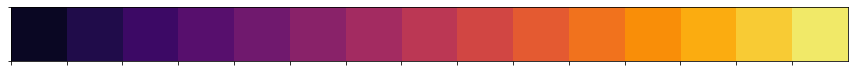

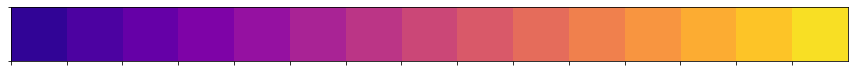

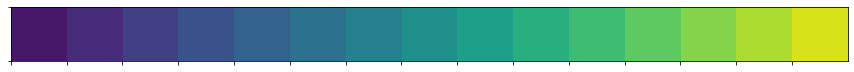

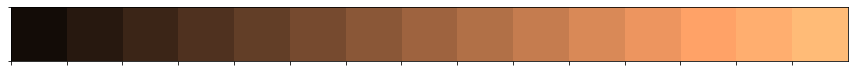

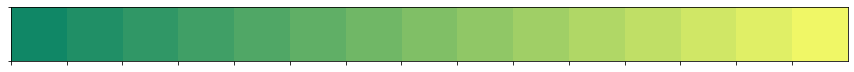

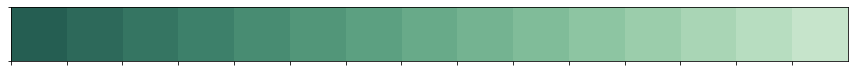

In [17]:
# Selecting the color palette for the graph

pal = sns.palplot(sns.color_palette("inferno", n_colors=15))
pal = sns.palplot(sns.color_palette("plasma", n_colors=15))
pal = sns.palplot(sns.color_palette("viridis", n_colors=15))
pal = sns.palplot(sns.color_palette("copper", n_colors=15))
pal = sns.palplot(sns.color_palette("summer", n_colors=15))
pal = sns.palplot(sns.color_palette("ch:2.5,-.2,dark=.3_r", n_colors=15))

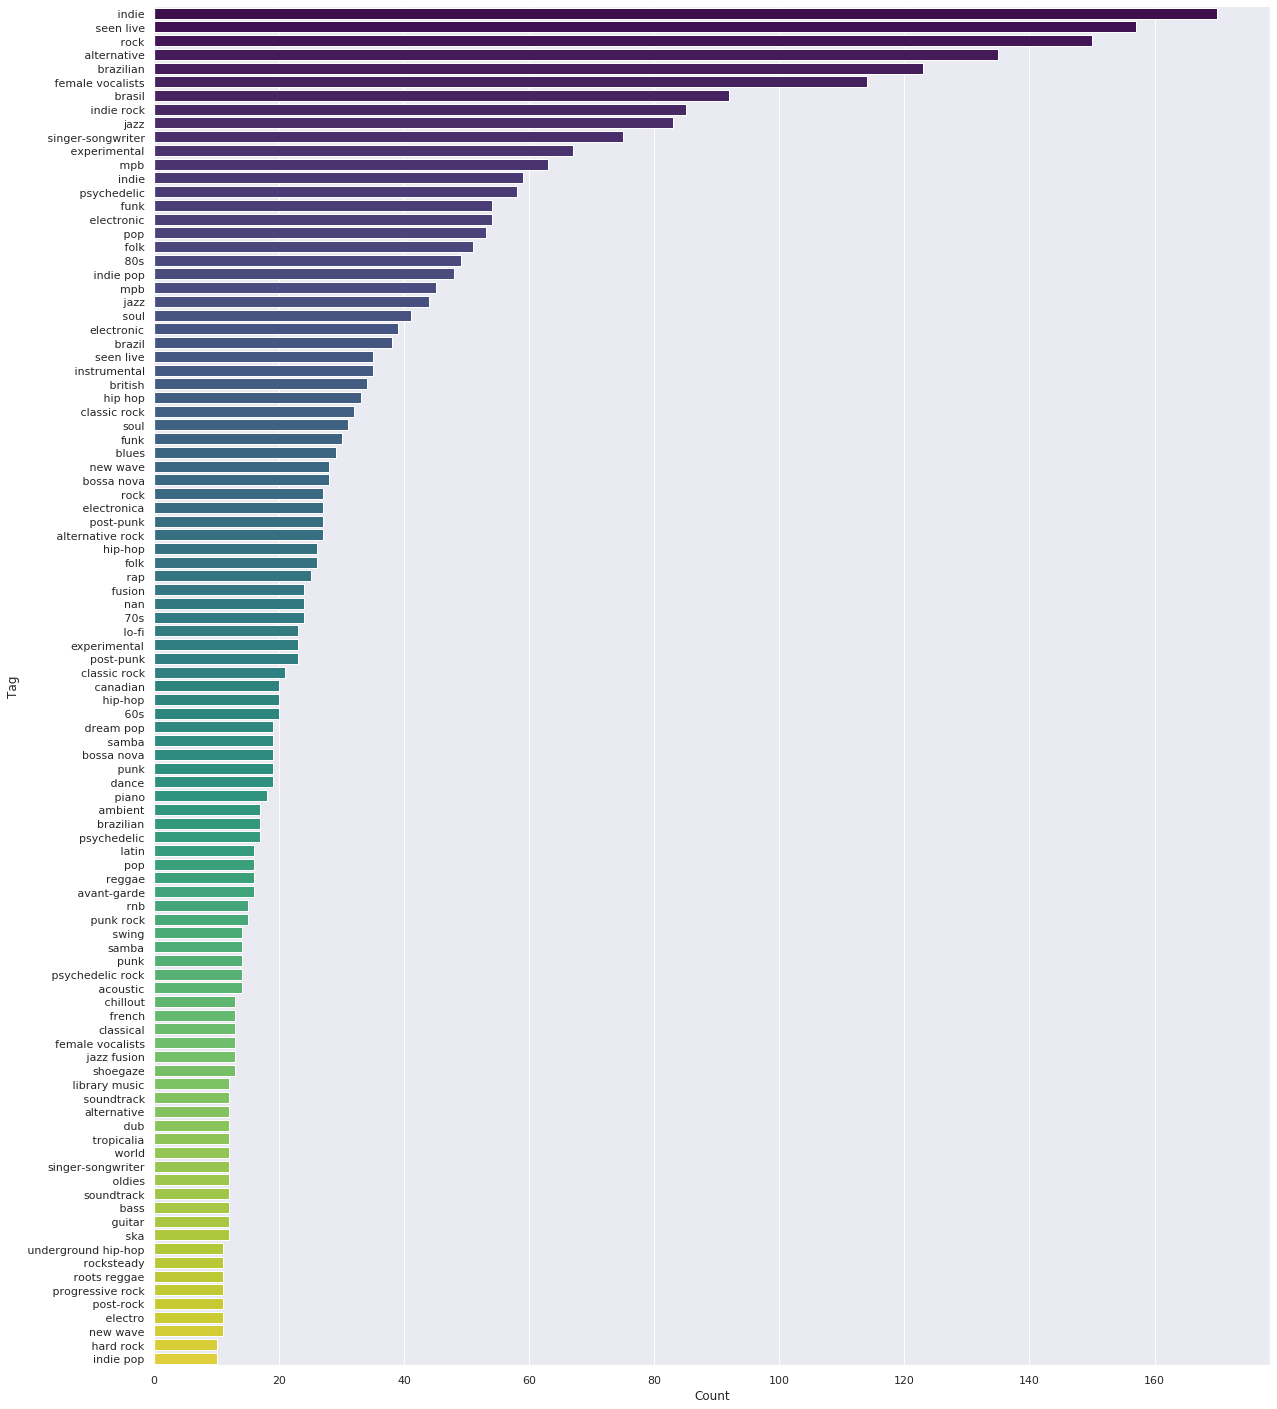

In [18]:
# Setting the figure size
plt.figure(figsize=(20,25))

# Background style
sns.set(style="darkgrid")

# Creating vertical bar plot to see how many times each tag is mentioned
tag_graph = sns.barplot(y=tags_df['tag'].iloc[0:99],
           x=tags_df['total'].iloc[0:99], palette="viridis",
           data = tags_df)

# X-axis label
plt.xlabel('Count')
# Y-axis label
plt.ylabel('Tag')

# Showing the graph
plt.show()

In [60]:
valid_tags = tags_df['tag'].iloc[:149].apply(lambda x: re.sub(r'^[ \t]+',"",x)).to_list()
print(valid_tags)

['indie', 'seen live', 'rock', 'alternative', 'brazilian', 'female vocalists', 'brasil', 'indie rock', 'jazz', 'singer-songwriter', 'experimental', 'mpb', 'indie', 'psychedelic', 'funk', 'electronic', 'pop', 'folk', '80s', 'indie pop', 'mpb', 'jazz', 'soul', 'electronic', 'brazil', 'seen live', 'instrumental', 'british', 'hip hop', 'classic rock', 'soul', 'funk', 'blues', 'new wave', 'bossa nova', 'rock', 'electronica', 'post-punk', 'alternative rock', 'hip-hop', 'folk', 'rap', 'fusion', 'nan', '70s', 'lo-fi', 'experimental', 'post-punk', 'classic rock', 'canadian', 'hip-hop', '60s', 'dream pop', 'samba', 'bossa nova', 'punk', 'dance', 'piano', 'ambient', 'brazilian', 'psychedelic', 'latin', 'pop', 'reggae', 'avant-garde', 'rnb', 'punk rock', 'swing', 'samba', 'punk', 'psychedelic rock', 'acoustic', 'chillout', 'french', 'classical', 'female vocalists', 'jazz fusion', 'shoegaze', 'library music', 'soundtrack', 'alternative', 'dub', 'tropicalia', 'world', 'singer-songwriter', 'oldies', 

In [19]:
# Defining the function to organize, group and reduce the number of tags
def str_tags(x):
    '''
    Group and delete some of the tags present in the tags columns of the DF

    '''
    # Lowercasing the string
    lower = str.lower(x)
    
    # List of tags considered to be too generic for labeling a musical style
    delete_tags = ['seen live', 'female vocalists', 'singer-songwriter', '80s', '70s', '60s','instrumental', 'nan', 'british', 'canadian',                     'oldies', 'world','guitar', 'mf doom', 'chillout', 'acoustic', 'piano', 'library music', 'psychedelic', 'bass',                             'soundtrack', 'french']

    # Transforming the strings into lists
    list_ = lower.split(',')
    
    # Creating a list to limit the number of tags (top 100 tags)
    valid_tags = tags_df['tag'].iloc[:99].apply(lambda x: re.sub(r'^[ \t]+',"",x)).to_list()

    # List to store tags not listed included in the 'delete tags' list
    new_list = []
    for t in list_:
        # Regex to delete the space found between the tags (after the commas)
        t = re.sub(r'^[ \t]+',"",t)
        # Conditional statement to append only the tags no listed in the 'delete tags' list
        if t not in delete_tags:
            new_list.append(t)

    # Converting the list into a string
    tag = ','.join([str(i) for i in new_list])
    

    # Conditional statements to group the tags related to Brazilian music into a unique tag: "brazilian "
    if 'brasil' in tag or 'mpb' in tag or 'brazil' in tag or 'bossa nova' in tag or 'tropicalia' in tag or 'samba' in tag:
        return 'brazilian'
    
    # If it doesn't fall into the "brazilian" tag, then consider the tag that appears first as the most relevant one
    #else:
        # Regex to keep only the first tag (remove all the characters after the first comma)
        #tag = re.sub( r'\,.*$', "", tag)
        # Regex to delete any space that may exist after the tag and make them match with the tags in the "valid_tags" list
        #tag = re.sub(r'^[ \t]+',"",tag)

        
        # Conditional statements to group some tags that might be redundant
     
    elif 'indie' in tag:
         return 'indie'
     
    elif 'rock' in tag or 'punk' in tag :
         return 'rock'
     
    elif 'rhythm and blues' in tag:
         return 'rnb'
     
    elif 'jazz' in tag:
         return 'jazz'
     
    elif 'roots reggae' in tag:
         return 'reggae'
         
    elif 'electronica' in tag or 'electro' in tag:
         return 'electronic'
     
    elif 'underground hip-hop' in tag:
         return 'hip-hop'

    elif tag not in valid_tags:
         return 'other'
     
    else:
         return tag

In [20]:
# Applying the str_tags function to create a new column in the DF
artists['tags_new'] = artists['tags'].apply(str_tags)

In [21]:
# Creating a new column to distinguish artists from Brazil from the ones from other countries
artists['nation'] = artists['tags'].apply(lambda x: 'brazilian' if 'brasil' 
                                        in x
                                        else( 'brazilian' if 'brazil' in x 
                                        else( 'brazilian' if 'mpb' in x 
                                        else('brazilian' if 'brazilian' in x else 'foreign'))))

In [22]:
# Searching for possible inconsistencies in the data
artists[(artists['tags_new'] == 'brazilian') & (artists['nation'] == 'foreign')] 

playcount                       artist  \
91          20                Club Silêncio   
104         18               Nouvelle Vague   
287          5                  Hubert Laws   
323          4         Satanique Samba Trio   
682          1  João Donato e Eumir Deodato   
907          1                  Wal Santana   

                                                  tags  \
91           noise, electronica, indie, rock, Brasilia   
104  Bossa Nova, french, female vocalists, chillout...   
287         jazz, flute, Smooth Jazz, funk, Bossa Nova   
323  experimental, Avant-Garde, samba, instrumental...   
682      jazz, Bossa Nova, instrumental, piano, Fusion   
907                          Samba MPB Psychedelic Pop   

                                       similar_artists  \
91   Watson, The Pro, Bois de Gerião, Fábio Pop, Se...   
104  Mélanie Pain, Koop, Keren Ann, Pink Martini, C...   
287  Roy Ayers Ubiquity, Gary Bartz, Herbie Mann, B...   
323  Guizado, Burro Morto, Zumbi do Mato, São Paulo...   
682  Bud Shank & João Donato, Raul De Souza Com Joã...   
907  Super Som Lord, Andre Mauro, Alma Tropicália, ...   

                                  similar_artists_list  \
91   [Watson, The Pro, Bois de Gerião, Fábio Pop, S...   
104  [Mélanie Pain, Koop, Keren Ann, Pink Martini, ...   
287  [Roy Ayers Ubiquity, Gary Bartz, Herbie Mann, ...   
323  [Guizado, Burro Morto, Zumbi do Mato, São Paul...   
682  [Bud Shank & João Donato, Raul De Souza Com Jo...   
907  [Super Som Lord, Andre Mauro, Alma Tropicália,...   

                      similar_artists_nx   tags_new   nation  
91   Watson, Hello Crazy People, Prot(o)  brazilian  foreign  
104            Air, Charlotte Gainsbourg  brazilian  foreign  
287                                 none  brazilian  foreign  
323                           Ema Stoned  brazilian  foreign  
682                                 none  brazilian  foreign  
907                                 none  brazilian  foreign

In [23]:
# Correcting the tags and assigining the correct nation to the rows listed above
artists['nation'].iloc[2] = 'brazilian'
artists['tags_new'].iloc[2] = 'brazilian'
artists['nation'].iloc[91] = 'brazilian'
artists['tags_new'].iloc[104] = 'other'
artists['tags_new'].iloc[287] = 'jazz'
artists['nation'].iloc[654] = 'brazilian'
artists['tags_new'].iloc[654] = 'brazilian'
artists['nation'].iloc[682] = 'brazilian'
artists['nation'].iloc[907] = 'brazilian'

### **1.1 - Similar artists with most occurrences**

In [24]:
# Creating a new DF without the artists with no similar artists listed

artists2 = artists
artists2.reset_index(drop=True, inplace=True)

In [25]:
# Number of occurrences of artists in the 'similar artists' column
sim_artists = artists2['similar_artists_nx'].apply(lambda x: str(x))

# Converting DF to list
count_artists = sim_artists.tolist()

In [26]:
# Empty list to store the results
similar_artists = []

# Looping to transform each similar artists entries into lists
for i in range(0, len(count_artists)):
    x = count_artists[i].split(', ')
    similar_artists.append(x)
    
# Visualizing the created list
print(similar_artists)

['none'], ['Foxygen', 'Connan Mockasin', 'Weyes Blood'], ['Eli Roth & Michael Bacall', 'Tracie Thoms & Zoe Bell'], ['none'], ['Eddie Beram', 'Tracie Thoms & Zoe Bell'], ['XTC'], ['none'], ['Evandro do Bandolim', 'Canhotinho'], ['The Band'], ['Milton Nascimento', 'Gilberto Gil', 'Jorge Mautner', 'Tom Zé', 'JARDS MACALÉ', 'Arrigo Barnabé', 'Sérgio Sampaio', 'Metá Metá'], ['none'], ['none'], ['David Lindup', 'Johnny Hawksworth', 'Simon Haseley', 'Steve Gray'], ['Cass McCombs', 'Damien Jurado'], ['Fiona Apple', 'Kate Bush'], ['Síntesis'], ['Metal Fingers', 'MF DOOM', 'Viktor Vaughn'], ['Nico', 'Brian Eno'], ['none'], ['Camera Obscura', 'The Pipettes'], ['Toquinho e Vinicius'], ['Minutemen', 'Hüsker Dü', 'Dinosaur Jr.', 'Mudhoney'], ['King Geedorah', 'Viktor Vaughn'], ['none'], ['none'], ['Devo'], ['Jorge Ben', 'Paulinho Da Viola', 'Wilson Simonal'], ['none'], ['none'], ['Jack Nitzsche', 'Smith'], ['Caetano Veloso', 'Gilberto Gil', 'Erasmo Carlos'], ['Black Alien', 'Emicida'], ['Boogie Down

In [27]:
# Merging the lists of lists
flat = itertools.chain.from_iterable(similar_artists)

# Converting the result to a list
similar_artists2 = list(flat)

# Visualizing the final list
print(similar_artists2)

, 'Tim Maia', 'Lô Borges', 'none', 'none', 'Billie Holiday', 'Ella Fitzgerald', 'Peggy Lee', 'Benny Goodman', 'Count Basie', 'The Fiery Furnaces', 'Architecture in Helsinki', 'Camera Obscura', 'The Concretes', 'The Walkmen', 'none', 'Jorge Ben', 'João Donato', 'João Gilberto', 'Edu Lobo', 'Erasmo Carlos', 'Arthur Verocai', 'Azymuth', 'Caetano Veloso', 'Marisa Monte', 'Gal Costa', 'Chico Buarque', 'Gilberto Gil', 'Nana Caymmi', 'Elis Regina', 'Adriana Calcanhotto', 'Deerhoof', 'Lightning Bolt', 'Lush', 'A Sunny Day In Glasgow', 'Broadcast', 'Stereolab', 'Gilberto Gil', 'João Bosco', 'Cartola', 'Nelson Cavaquinho', 'Ema Stoned', 'Caetano Veloso', 'Milton Nascimento', 'Os Mutantes', 'Novos Baianos', 'Gilberto Gil', 'Tom Zé', 'Cartola', 'none', 'Radiohead', 'Talking Heads', 'The Cure', 'Pulp', 'New Order', 'Blur', 'Joy Division', 'The Stone Roses', 'Les Savy Fav', 'Cartola', 'Paulinho Da Viola', 'Nelson Cavaquinho', 'Eric B. & Rakim', 'Ismael Silva', 'The National', 'Vampire Weekend', 'The

In [28]:
# Count of how many times an artist is mentioned as being similar to other artists 
values, counts = np.unique(similar_artists2, return_counts=True)

# Transforming the results into a DF
occurr = pd.DataFrame({'artist': values, 'occurrences': counts})

# Sorting the DF by number of occurrences
occurr.sort_values(by='occurrences', ascending=False, inplace=True)

# Reseting the index
occurr.reset_index(inplace=True)
occurr.drop(['index'], axis=1, inplace=True)
occurr.drop([0], inplace=True)

In [29]:
# Top 20 most mentioned artists

occurr.head(20)

artist  occurrences
1        Gilberto Gil           35
2      Caetano Veloso           26
3              Tom Zé           22
4       Chico Buarque           18
5        JARDS MACALÉ           17
6      Maria Bethânia           16
7   Paulinho Da Viola           16
8           Gal Costa           16
9           Jorge Ben           16
10      Novos Baianos           15
11        Elis Regina           14
12  Milton Nascimento           14
13            Cartola           13
14        The Beatles           12
15     Sérgio Sampaio           12
16               Wire           12
17          Cat Power           12
18         Steve Gray           11
19        João Donato           11
20  Animal Collective           11

In [30]:
# Adding the number of occurances of each artists to the 'artists' DF
artists.insert(1, 'mentions', artists['artist'].map(occurr.set_index('artist')['occurrences']))

In [31]:
# Filling null values of mentions with 0's
artists['mentions'].fillna(0, inplace=True)

In [32]:
# Looking at the new 'mentions 'column
artists.sort_values(by='mentions', ascending=False)

playcount  mentions                  artist  \
101         18      35.0            Gilberto Gil   
0          189      26.0          Caetano Veloso   
134         15      22.0                  Tom Zé   
86          22      18.0           Chico Buarque   
168         12      17.0            JARDS MACALÉ   
..         ...       ...                     ...   
577          1       0.0          Carlos Cachaça   
219          8       0.0              Jamiroquai   
574          1       0.0     Camille Saint-Saens   
573          1       0.0  Calexico / Iron & Wine   
921          1       0.0                    鷺巣詩郎   

                                                  tags  \
101     brazilian, mpb, Bossa Nova, tropicalia, brasil   
0       mpb, brazilian, Bossa Nova, tropicalia, brasil   
134   tropicalia, mpb, brazilian, experimental, brasil   
86           mpb, Bossa Nova, brazilian, samba, brasil   
168   mpb, tropicalia, brazilian, experimental, brasil   
..                                                 ...   
577            samba, samba de raiz, brasil, brazilian   
219            funk, acid jazz, electronic, dance, pop   
574   Classical, romantic, french, composers, composer   
573  folk, indie, Alt-country, singer-songwriter, a...   
921   Soundtrack, japanese, anime, instrumental, j-pop   

                                       similar_artists  \
101  Caetano Veloso, Gal Costa, Luiz Melodia, Tom Z...   
0    Gilberto Gil, Gal Costa, Maria Bethânia, Chico...   
134  JARDS MACALÉ, Gilberto Gil, Caetano Veloso, No...   
86   Caetano Veloso, Elis Regina, Gilberto Gil, Mar...   
168                                                nan   
..                                                 ...   
577  Xangô Da Mangueira, Nelson Sargento, Aniceto d...   
219  Incognito, The Brand New Heavies, Lenny Kravit...   
574  Gabriel Fauré, Franz Liszt, Antonín Dvořák, Fe...   
573  Iron & Wine, Calexico, Bill Callahan, Jenny Le...   
921  Yoko Takahashi, Loren & Mash, 高橋洋子, 菅野よう子, 岩崎琢...   

                                  similar_artists_list  \
101  [Caetano Veloso, Gal Costa, Luiz Melodia, Tom ...   
0    [Gilberto Gil, Gal Costa, Maria Bethânia, Chic...   
134  [JARDS MACALÉ, Gilberto Gil, Caetano Veloso, N...   
86   [Caetano Veloso, Elis Regina, Gilberto Gil, Ma...   
168                                              [nan]   
..                                                 ...   
577  [Xangô Da Mangueira, Nelson Sargento, Aniceto ...   
219  [Incognito, The Brand New Heavies, Lenny Kravi...   
574  [Gabriel Fauré, Franz Liszt, Antonín Dvořák, F...   
573  [Iron & Wine, Calexico, Bill Callahan, Jenny L...   
921  [Yoko Takahashi, Loren & Mash, 高橋洋子, 菅野よう子, 岩崎...   

                                    similar_artists_nx   tags_new     nation  
101  Caetano Veloso, Jorge Ben, Milton Nascimento, ...  brazilian  brazilian  
0    Milton Nascimento, Novos Baianos, Gal Costa, C...  brazilian  brazilian  
134  Caetano Veloso, Jorge Ben, Os Mutantes, Novos ...  brazilian  brazilian  
86   Caetano Veloso, Milton Nascimento, Gal Costa, ...  brazilian  brazilian  
168                                               none  brazilian  brazilian  
..                                                 ...        ...        ...  
577                                       Ismael Silva  brazilian  brazilian  
219                               Kool & The Gang, Us3       jazz    foreign  
574                                     Franz Schubert      other    foreign  
573                                        Andrew Bird      indie    foreign  
921                                               none      other    foreign  

[922 rows x 9 columns]

### **1.2 - Network Analysis**

In [33]:
# Visualizing the list of lists for similar artists

print(similar_artists)

['none'], ['Foxygen', 'Connan Mockasin', 'Weyes Blood'], ['Eli Roth & Michael Bacall', 'Tracie Thoms & Zoe Bell'], ['none'], ['Eddie Beram', 'Tracie Thoms & Zoe Bell'], ['XTC'], ['none'], ['Evandro do Bandolim', 'Canhotinho'], ['The Band'], ['Milton Nascimento', 'Gilberto Gil', 'Jorge Mautner', 'Tom Zé', 'JARDS MACALÉ', 'Arrigo Barnabé', 'Sérgio Sampaio', 'Metá Metá'], ['none'], ['none'], ['David Lindup', 'Johnny Hawksworth', 'Simon Haseley', 'Steve Gray'], ['Cass McCombs', 'Damien Jurado'], ['Fiona Apple', 'Kate Bush'], ['Síntesis'], ['Metal Fingers', 'MF DOOM', 'Viktor Vaughn'], ['Nico', 'Brian Eno'], ['none'], ['Camera Obscura', 'The Pipettes'], ['Toquinho e Vinicius'], ['Minutemen', 'Hüsker Dü', 'Dinosaur Jr.', 'Mudhoney'], ['King Geedorah', 'Viktor Vaughn'], ['none'], ['none'], ['Devo'], ['Jorge Ben', 'Paulinho Da Viola', 'Wilson Simonal'], ['none'], ['none'], ['Jack Nitzsche', 'Smith'], ['Caetano Veloso', 'Gilberto Gil', 'Erasmo Carlos'], ['Black Alien', 'Emicida'], ['Boogie Down

In [34]:
# Number of similar artists for each artists

# Empty list to store the length of each one of the lists
lenght = []

# Loop in order to return the lenght of all lists
for i in range(0, len(similar_artists)):
    lenght.append(len(similar_artists[i]))
    
# Print list containing all the lenghts
print(lenght)

[9, 8, 2, 1, 8, 5, 3, 2, 8, 6, 2, 7, 3, 5, 4, 4, 9, 2, 1, 5, 1, 6, 1, 3, 9, 1, 8, 2, 8, 2, 4, 10, 1, 6, 5, 4, 6, 9, 5, 5, 2, 3, 4, 5, 2, 5, 3, 4, 1, 2, 4, 2, 3, 1, 2, 1, 1, 5, 5, 4, 3, 4, 3, 3, 5, 4, 1, 7, 1, 3, 1, 1, 2, 1, 1, 2, 5, 1, 1, 5, 4, 3, 9, 2, 5, 1, 8, 5, 2, 4, 7, 3, 2, 2, 1, 2, 1, 1, 4, 2, 1, 9, 7, 1, 2, 4, 2, 3, 4, 4, 4, 2, 7, 1, 2, 1, 2, 9, 7, 4, 4, 1, 1, 1, 3, 2, 1, 3, 3, 2, 7, 1, 2, 1, 9, 1, 2, 1, 5, 6, 5, 1, 1, 1, 1, 1, 1, 3, 4, 6, 2, 1, 1, 1, 1, 1, 3, 3, 7, 1, 1, 2, 4, 2, 1, 4, 9, 1, 1, 1, 1, 5, 6, 6, 2, 4, 6, 1, 3, 1, 3, 1, 5, 2, 1, 5, 4, 1, 1, 2, 4, 1, 5, 4, 6, 2, 4, 3, 1, 1, 4, 1, 3, 7, 1, 1, 1, 7, 5, 1, 1, 1, 7, 2, 3, 2, 5, 1, 3, 2, 1, 3, 6, 1, 1, 4, 1, 1, 1, 2, 1, 1, 2, 1, 1, 6, 3, 1, 2, 3, 2, 1, 3, 1, 1, 1, 4, 1, 4, 6, 1, 3, 1, 4, 6, 2, 4, 1, 3, 5, 2, 2, 1, 1, 1, 1, 3, 3, 1, 1, 5, 2, 6, 1, 5, 1, 1, 2, 1, 3, 1, 6, 1, 7, 1, 1, 1, 1, 5, 5, 4, 9, 2, 2, 3, 1, 1, 2, 2, 5, 5, 3, 1, 2, 6, 1, 6, 3, 4, 3, 1, 1, 7, 1, 1, 5, 5, 1, 7, 8, 2, 4, 4, 1, 7, 1, 8, 1, 3, 1, 1, 5, 2,

In [35]:
# Checking if the lenght of the DF and the list of list matches
print(len(similar_artists))
print(artists2.shape)

922
(922, 9)


In [36]:
# Creating nodes
source_artists = []
for artist in artists2['artist']:
    for i in range(0,lenght[artists2[artists2['artist'] == artist].index.values.astype(int)[0]]):
        source_artists.append(artist)

print(source_artists)

eastie Boys', 'Beastie Boys', 'Beastie Boys', 'Beastie Boys', 'Besouro Mulher', 'Big Star', 'Bixiga 70', 'Black Lips', 'Black Rebel Motorcycle Club', 'Blind Faith', 'Blood Orange', 'Blood Orange', 'bloody carambola', 'Blouse', 'Buddy Holly', 'Cab Calloway', 'Cab Calloway', 'Cab Calloway', 'Caetano Veloso & Gal Costa', 'Caetano Veloso & Gal Costa', 'Caetano Veloso & Gilberto Gil', 'Caetano Veloso & Gilberto Gil', 'Caetano Veloso & Gilberto Gil', 'Caetano Veloso & Gilberto Gil', 'Caetano Veloso & Gilberto Gil', 'Caetano Veloso & Gilberto Gil', 'Caetano Veloso & Gilberto Gil', 'Café Tacuba', 'Carlos Dafé', 'Cesar Camargo Mariano', 'Cesar Camargo Mariano', 'Chet Baker', 'Chet Baker', 'Cult of Luna', 'Daniel Johnston', 'Dave Dee, Dozy, Beaky, Mick & Titch', 'David Lindup', 'David Lindup', 'David Lindup', 'David Lindup', 'Deadline', 'Destroyer', 'Destroyer', 'Destroyer', 'Dick Annegarn', 'Django Reinhardt', 'Django Reinhardt', 'Django Reinhardt', 'Domino, Fats', 'Elizeth Cardoso', 'Elizeth C

In [37]:
# Importing itertools package
import itertools

# Merging the lists of lists
flat = itertools.chain.from_iterable(similar_artists)

# Converting the result to a list
edge_artists = list(flat)

# Visualizing the final list
print(edge_artists)

, 'Tim Maia', 'Lô Borges', 'none', 'none', 'Billie Holiday', 'Ella Fitzgerald', 'Peggy Lee', 'Benny Goodman', 'Count Basie', 'The Fiery Furnaces', 'Architecture in Helsinki', 'Camera Obscura', 'The Concretes', 'The Walkmen', 'none', 'Jorge Ben', 'João Donato', 'João Gilberto', 'Edu Lobo', 'Erasmo Carlos', 'Arthur Verocai', 'Azymuth', 'Caetano Veloso', 'Marisa Monte', 'Gal Costa', 'Chico Buarque', 'Gilberto Gil', 'Nana Caymmi', 'Elis Regina', 'Adriana Calcanhotto', 'Deerhoof', 'Lightning Bolt', 'Lush', 'A Sunny Day In Glasgow', 'Broadcast', 'Stereolab', 'Gilberto Gil', 'João Bosco', 'Cartola', 'Nelson Cavaquinho', 'Ema Stoned', 'Caetano Veloso', 'Milton Nascimento', 'Os Mutantes', 'Novos Baianos', 'Gilberto Gil', 'Tom Zé', 'Cartola', 'none', 'Radiohead', 'Talking Heads', 'The Cure', 'Pulp', 'New Order', 'Blur', 'Joy Division', 'The Stone Roses', 'Les Savy Fav', 'Cartola', 'Paulinho Da Viola', 'Nelson Cavaquinho', 'Eric B. & Rakim', 'Ismael Silva', 'The National', 'Vampire Weekend', 'The

In [38]:
# Creating a DF for the network graph
net_artists = pd.DataFrame({'source': source_artists, 'target': edge_artists })

In [39]:
# Visualizing the newly created DF
net_artists

source             target
0           Caetano Veloso  Milton Nascimento
1           Caetano Veloso      Novos Baianos
2           Caetano Veloso          Gal Costa
3           Caetano Veloso      Chico Buarque
4           Caetano Veloso       Gilberto Gil
...                    ...                ...
2298                   WOW               none
2299       Ximena Sariñana               none
2300        Yevgeny Kissin  Vladimir Horowitz
2301  Ямыч Восточный Округ               none
2302                  鷺巣詩郎               none

[2303 rows x 2 columns]

Nodes: artists

Edges: similar artists

In [40]:
# Importing Networkx package
import networkx as nx

In [41]:
# Creating the graph object
g = nx.Graph()

In [42]:
# Adding nodes and attributes to the network
for i in artists['artist']:
    g.add_node(i, tag=artists['tags_new'][artists['artist'] == i].item(), nation=artists['nation'][artists['artist'] == i].item(),
               playcount=artists['playcount'][artists['artist'] == i].item(),
               mentions=artists['mentions'][artists['artist'] == i].item())

# Adding edges and attributes to the network 
for i,row in net_artists.iterrows():
    g.add_edge(row['source'], row['target'], tag=artists['tags_new'][artists['artist'] == row['source']].item(), 
               playcount=artists['playcount'][artists['artist'] == row['source']].item(),
               mentions=artists['mentions'][artists['artist'] == row['source']].item())

In [43]:
# Checking if all the nodes have the 'tag' attribute assigned
nx.get_node_attributes(g, 'tag')

acker': 'electronic',
 'The Magnetic Fields': 'indie',
 'Valet': 'other',
 'Vivian Girls': 'indie',
 'Weekend': 'indie',
 'Air': 'electronic',
 'Arctic Monkeys': 'indie',
 'Brian Eno': 'electronic',
 'Carne Doce': 'brazilian',
 'Charles Mingus': 'jazz',
 'Chris Connelly': 'rock',
 'Edu Lobo': 'brazilian',
 'Liars': 'indie',
 'Little Quail and the Mad Birds': 'brazilian',
 'Morning Teleportation': 'indie',
 'Neu!': 'rock',
 'Opal': 'indie',
 'Panda Bear': 'indie',
 'Pat Metheny Group': 'jazz',
 'Raz, Dwa,Trzy': 'rock',
 'Richard Ashcroft': 'indie',
 'Rogério Duprat': 'brazilian',
 'Van Dyke Parks': 'other',
 'Violeta Parra': 'other',
 'YMA': 'indie',
 'Alan Moorhouse': 'jazz',
 'All Girl Summer Fun Band': 'indie',
 'Big Thief': 'indie',
 'Birdy Nam Nam': 'electronic',
 'Broadcast': 'indie',
 'Fiona Apple': 'indie',
 'Fujiya & Miyagi': 'indie',
 'Galaxie 500': 'indie',
 'Geoff Knorr': 'other',
 'Helado Negro': 'electronic',
 'Hüsker Dü': 'rock',
 'Jon Spencer Blues Explosion': 'rock',
 '

In [44]:
# Checking if all the nodes have all attributes assigned
print(g.nodes.data())

s': 0.0}), ('La Luz', {'tag': 'other', 'nation': 'foreign', 'playcount': 1, 'mentions': 0.0}), ('Lamparina e A Primavera', {'tag': 'brazilian', 'nation': 'brazilian', 'playcount': 1, 'mentions': 0.0}), ('Larry Graham', {'tag': 'other', 'nation': 'foreign', 'playcount': 1, 'mentions': 3.0}), ('Larry Graham & Graham Central Station', {'tag': 'rnb', 'nation': 'foreign', 'playcount': 1, 'mentions': 0.0}), ("Lee 'Scratch' Perry", {'tag': 'reggae', 'nation': 'foreign', 'playcount': 1, 'mentions': 0.0}), ("Lee 'Scratch' Perry & The Upsetters", {'tag': 'rock', 'nation': 'foreign', 'playcount': 1, 'mentions': 0.0}), ('Lee Fields & The Expressions', {'tag': 'other', 'nation': 'foreign', 'playcount': 1, 'mentions': 1.0}), ('Lee Mason', {'tag': 'other', 'nation': 'foreign', 'playcount': 1, 'mentions': 2.0}), ('Les Filles De Illighadad', {'tag': 'other', 'nation': 'foreign', 'playcount': 1, 'mentions': 1.0}), ('Les Rita Mitsouko', {'tag': 'rock', 'nation': 'foreign', 'playcount': 1, 'mentions': 0.0

In [45]:
# Assigning atributes for the 'none' tag
g.add_node('none', tag='other', nation='foreign', mentions=0, playcount=0)

In [46]:
# Checking if the edges also have attributes assigned
print(g.edges.data())

anessa da Mata', {'tag': 'brazilian', 'playcount': 1, 'mentions': 3.0}), ('Dobrinka Tabakova', 'none', {'tag': 'jazz', 'playcount': 1, 'mentions': 0.0}), ('Donovan', 'The Incredible String Band', {'tag': 'rock', 'playcount': 1, 'mentions': 1.0}), ('Donovan', 'The Kinks', {'tag': 'rock', 'playcount': 1, 'mentions': 3.0}), ('Donovan', 'The Zombies', {'tag': 'rock', 'playcount': 1, 'mentions': 5.0}), ('Dr. Dre feat. Eminem', 'none', {'tag': 'other', 'playcount': 1, 'mentions': 0.0}), ('DUDA BEAT', 'Mc Tha', {'tag': 'brazilian', 'playcount': 1, 'mentions': 4.0}), ('DUDA BEAT', 'Potyguara Bardo', {'tag': 'brazilian', 'playcount': 1, 'mentions': 2.0}), ('DUDA BEAT', 'Lamparina e A Primavera', {'tag': 'brazilian', 'playcount': 1, 'mentions': 0.0}), ('Dumbo Gets Mad', "Melody's Echo Chamber", {'tag': 'indie', 'playcount': 1, 'mentions': 4.0}), ('Dvorak', 'Franz Schubert', {'tag': 'other', 'playcount': 1, 'mentions': 0.0}), ('Earth, Wind & Fire', 'Kool & The Gang', {'tag': 'other', 'playcount':

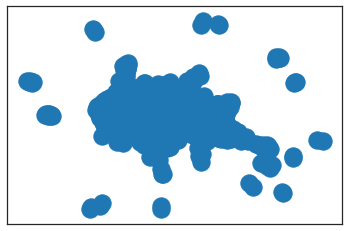

In [47]:
# Background style
sns.set(style="white")

# Drawing a simple netwokr
nx.draw_networkx(g,cmap='inferno',  with_labels=False, figsize=(10,10))
plt.show()

In [48]:
# Importing the Nxviz package
import nxviz as nxv

# Importing the community package
import community

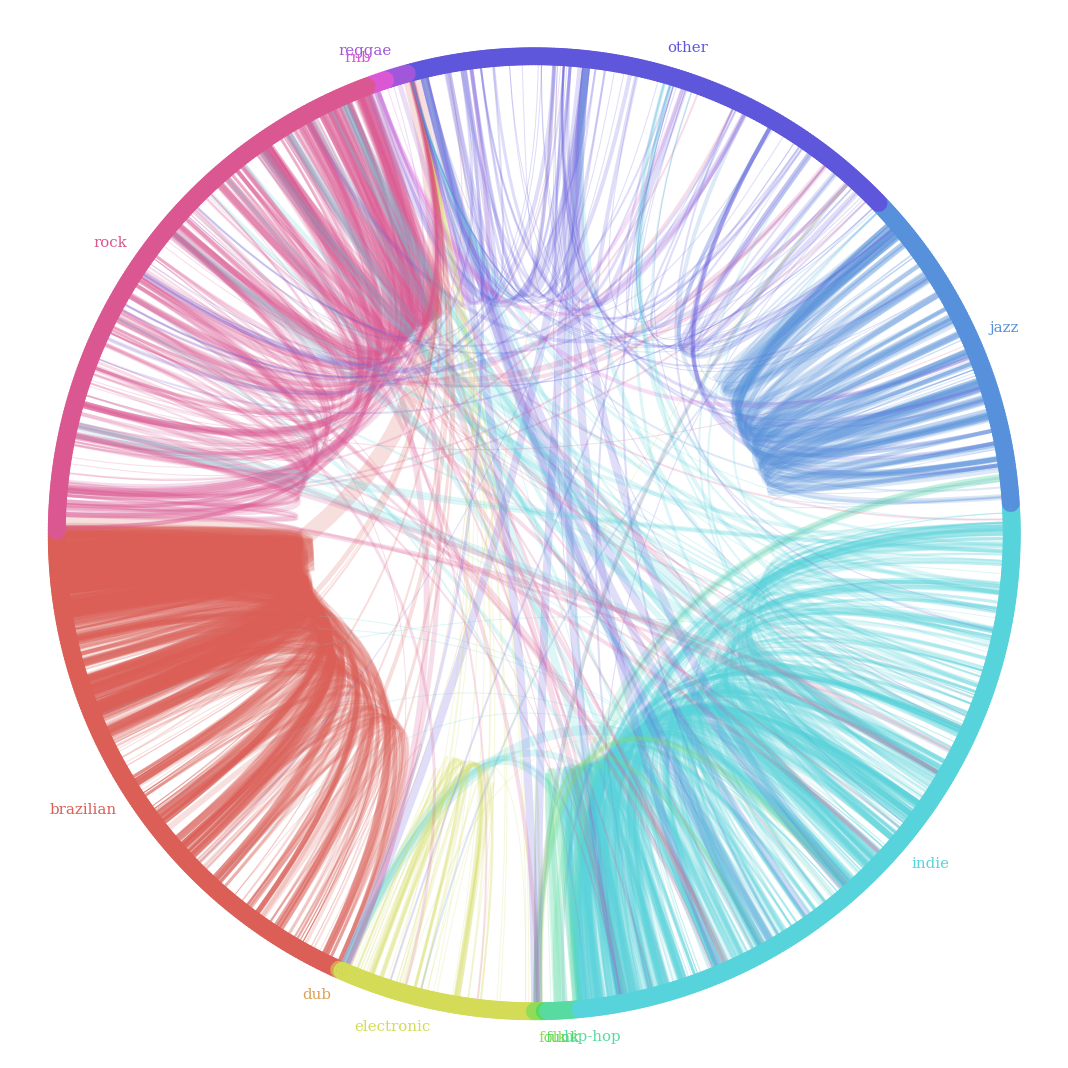

In [49]:
c = nxv.CircosPlot(g,
                   node_label_layout='rotation', 
                   node_color='tag',
                   node_grouping="tag",
                   node_order='tag',
                   nodeprops ={"radius":5},
                   edge_width='mentions',
                   edge_color='tag',
                   group_label_position='middle',
                   group_label_color=True,
                   group_label_offset=25,
                   fontsize = 15,   
                   figsize=(15,15))
c.draw()
c.figure.tight_layout()
plt.draw()

In [50]:
att = nx.get_node_attributes(g, 'tag')
att

c',
 'The Magnetic Fields': 'indie',
 'Valet': 'other',
 'Vivian Girls': 'indie',
 'Weekend': 'indie',
 'Air': 'electronic',
 'Arctic Monkeys': 'indie',
 'Brian Eno': 'electronic',
 'Carne Doce': 'brazilian',
 'Charles Mingus': 'jazz',
 'Chris Connelly': 'rock',
 'Edu Lobo': 'brazilian',
 'Liars': 'indie',
 'Little Quail and the Mad Birds': 'brazilian',
 'Morning Teleportation': 'indie',
 'Neu!': 'rock',
 'Opal': 'indie',
 'Panda Bear': 'indie',
 'Pat Metheny Group': 'jazz',
 'Raz, Dwa,Trzy': 'rock',
 'Richard Ashcroft': 'indie',
 'Rogério Duprat': 'brazilian',
 'Van Dyke Parks': 'other',
 'Violeta Parra': 'other',
 'YMA': 'indie',
 'Alan Moorhouse': 'jazz',
 'All Girl Summer Fun Band': 'indie',
 'Big Thief': 'indie',
 'Birdy Nam Nam': 'electronic',
 'Broadcast': 'indie',
 'Fiona Apple': 'indie',
 'Fujiya & Miyagi': 'indie',
 'Galaxie 500': 'indie',
 'Geoff Knorr': 'other',
 'Helado Negro': 'electronic',
 'Hüsker Dü': 'rock',
 'Jon Spencer Blues Explosion': 'rock',
 'Polica': 'indie',


In [51]:
s = set(style for dic in att for style in att.values())
s

{'brazilian',
 'dub',
 'electronic',
 'folk',
 'funk',
 'hip-hop',
 'indie',
 'jazz',
 'other',
 'reggae',
 'rnb',
 'rock'}

In [52]:
def circos_style():
    
    print('Please select of of the following styles: ')
    s = set(style for dic in att for style in att.values())
    print(s)    
    style = input()

    nodes = [n for n, v in g.nodes(data=True) if v['tag'] == style]
    
    edges = [(u,v) for u,v,e in g.edges(data=True) if e['tag'] == style]
    
    circos = g.subgraph(nodes)

    c = nxv.CircosPlot(circos,
                   node_labels=True,
                   node_label_layout='rotation', 
                   #node_grouping="tag",
                   node_order='playcount',
                   nodeprops ={"radius":5},
                   edge_width='mentions',
                   #edge_color='mentions',
                   #group_label_position='middle',
                   #group_label_color=True,
                   #group_label_offset=25,
                   fontsize = 10,   
                   figsize=(20,20))

    c.draw()
    return plt.draw()


    


Please select of of the following styles: 
{'jazz', 'dub', 'indie', 'reggae', 'rock', 'hip-hop', 'electronic', 'other', 'rnb', 'folk', 'brazilian', 'funk'}


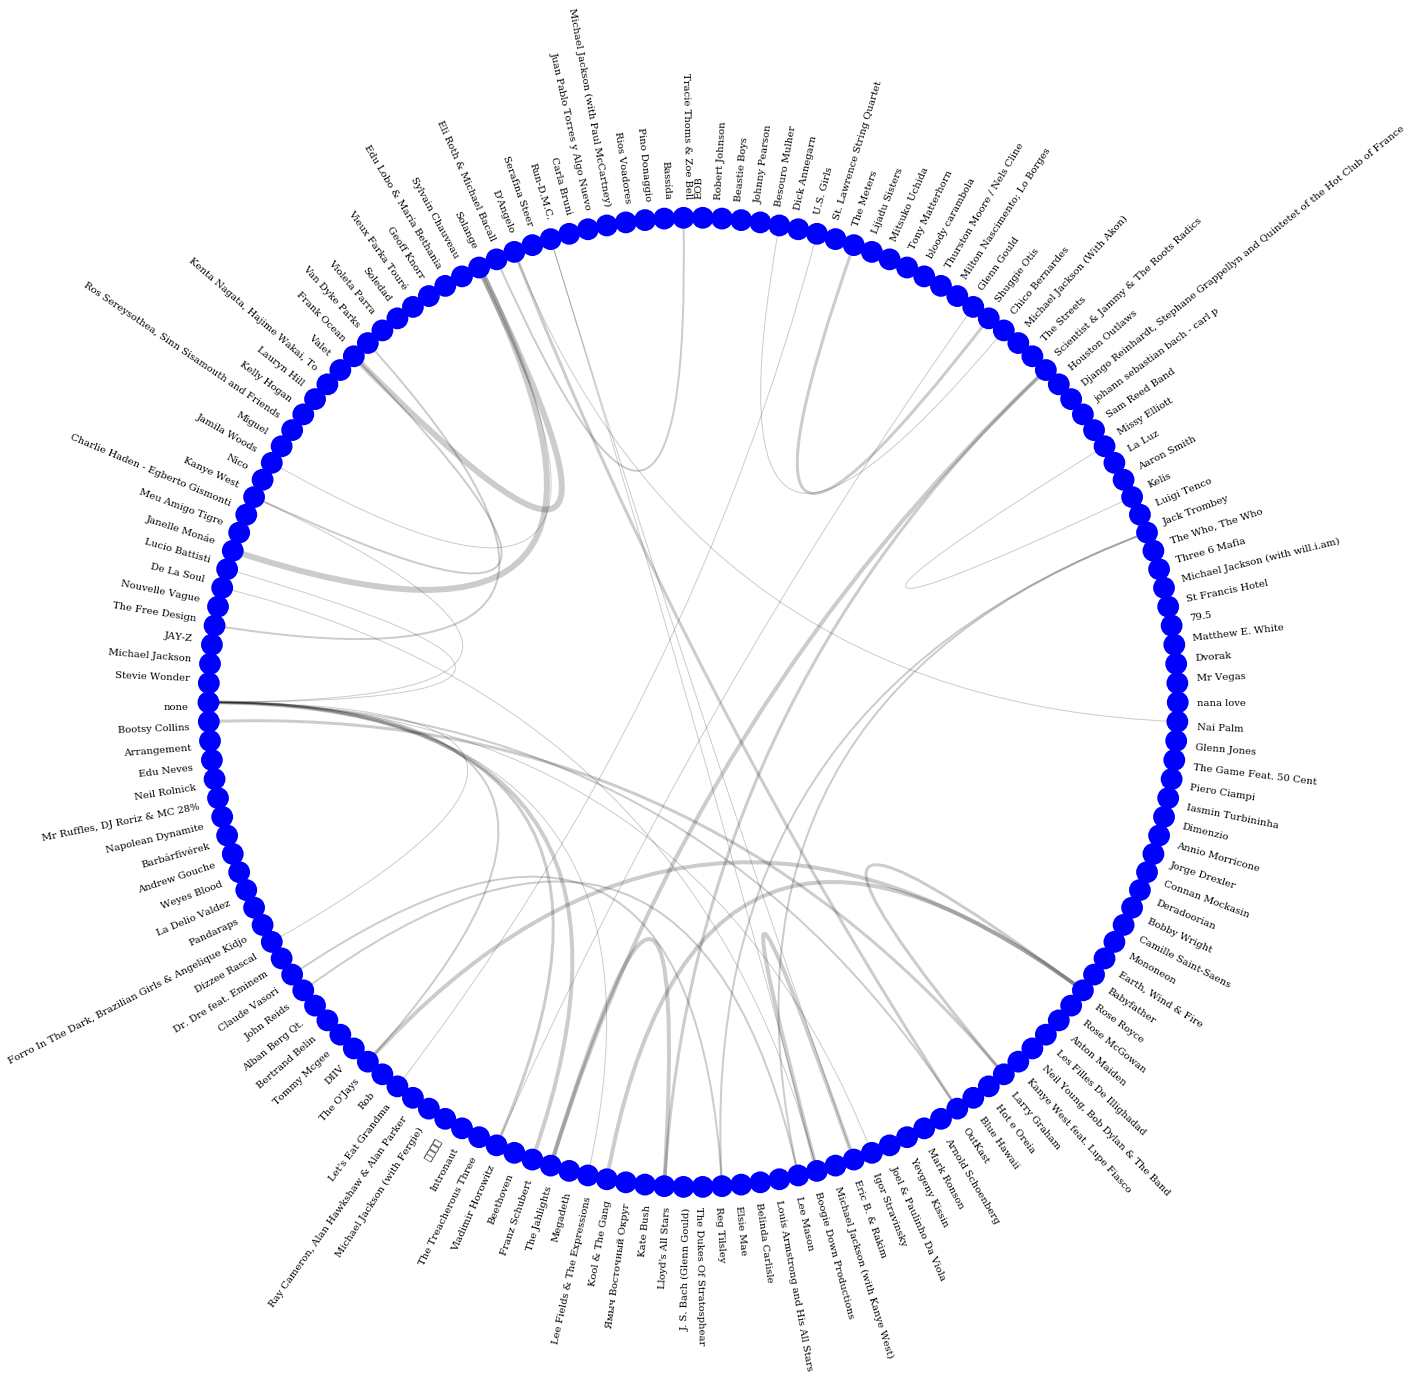

In [56]:
circos_style()

In [62]:
artists[artists['artist'] == 'Dizzee Rascal']

playcount  mentions         artist  \
610          1       1.0  Dizzee Rascal   

                                        tags  \
610  Grime, Hip-Hop, seen live, rap, british   

                                       similar_artists  \
610  Wiley, JME, Lethal Bizzle, Kano, Skepta, Giggs...   

                                  similar_artists_list similar_artists_nx  \
610  [Wiley, JME, Lethal Bizzle, Kano, Skepta, Gigg...               none   

    tags_new   nation  
610    other  foreign